<a href="https://colab.research.google.com/github/tejasreejilla/amazon-sales-data-analyst/blob/main/data_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries


In [2]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for handling datetime
from datetime import datetime

# Library for clustering and segmentation
from sklearn.cluster import KMeans


loading the data

In [5]:
# Load the dataset
file_path = "/content/Amazon Sale Report.csv"  # Replace with the correct path
data = pd.read_csv(file_path)

In [12]:
print("the few rows of the give amazon salesare")
data.head()

the few rows of the give amazon salesare


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


inspect the dataset and cleaning it

In [13]:
# Check for null values in each column
data.isnull().sum()

# Convert 'Date' column to datetime format for better analysis
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Handle missing or null values: Fill or drop rows
data['Amount'].fillna(data['Amount'].mean(), inplace=True)  # Filling missing Amount with the mean
data.dropna(subset=['Order ID', 'Category', 'Qty'], inplace=True)  # Drop rows where key columns are missing

# Remove duplicates if there are any
data.drop_duplicates(inplace=True)

# Standardize text columns: Strip whitespace and convert to lowercase
text_columns = ['Status', 'Fulfilment', 'Sales Channel', 'ship-service-level',
                'Category', 'Courier Status', 'currency', 'ship-city',
                'ship-state', 'ship-country', 'fulfilled-by']

for col in text_columns:
    data[col] = data[col].str.strip().str.lower()

# Fix the data types for numerical columns like 'Qty' and 'Amount'
data['Qty'] = pd.to_numeric(data['Qty'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Handle outliers for numerical columns (optional, based on data distribution)
data = data[(data['Amount'] >= 0) & (data['Qty'] >= 0)]  # Removing rows with negative values if they exist

# Resetting the index after cleaning
data.reset_index(drop=True, inplace=True)

# Display cleaned data summary
print(data.info())
print(data.head())


<ipython-input-13-69ffb0ba7302>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-13-69ffb0ba7302>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount'].fillna(data['Amount'].mean(), inplace=True)  # Filling missing Amount with the mean


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128017 entries, 0 to 128016
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128017 non-null  object        
 1   Date                128017 non-null  datetime64[ns]
 2   Status              128017 non-null  object        
 3   Fulfilment          128017 non-null  object        
 4   Sales Channel       128017 non-null  object        
 5   ship-service-level  128017 non-null  object        
 6   Category            128017 non-null  object        
 7   Size                128017 non-null  object        
 8   Courier Status      128017 non-null  object        
 9   Qty                 128017 non-null  int64         
 10  currency            120454 non-null  object        
 11  Amount              128017 non-null  float64       
 12  ship-city           127985 non-null  object        
 13  ship-state          127985 no

In [9]:
# Print column names
print("Column names in the dataset:")
print(data.columns)

Column names in the dataset:
Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


sales analysis


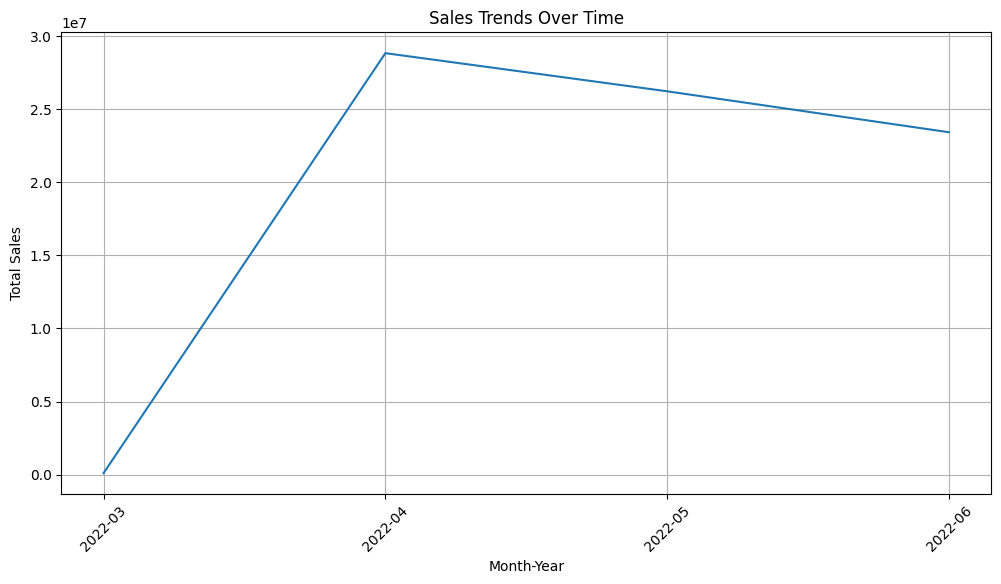

Total Revenue: $78,590,170.25
Average Order Value (AOV): $648.56


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Amount' to numeric, replacing invalid entries with NaN
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Drop rows with NaN in 'Amount' column
data = data.dropna(subset=['Amount'])

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with NaT in 'Date' column
data = data.dropna(subset=['Date'])

# Create a Month-Year column for trend analysis
data['Month-Year'] = data['Date'].dt.to_period('M').astype(str)

# Calculate total sales per month
sales_trends = data.groupby('Month-Year', as_index=False)['Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Month-Year', y='Amount')
plt.title("Sales Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Calculate Total Revenue and Average Order Value (AOV)
total_revenue = data['Amount'].sum()
average_order_value = data['Amount'].mean()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value (AOV): ${average_order_value:,.2f}")


product performance anaysis

<ipython-input-10-9c001fbe0b0f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Category', y='Qty', palette='viridis')


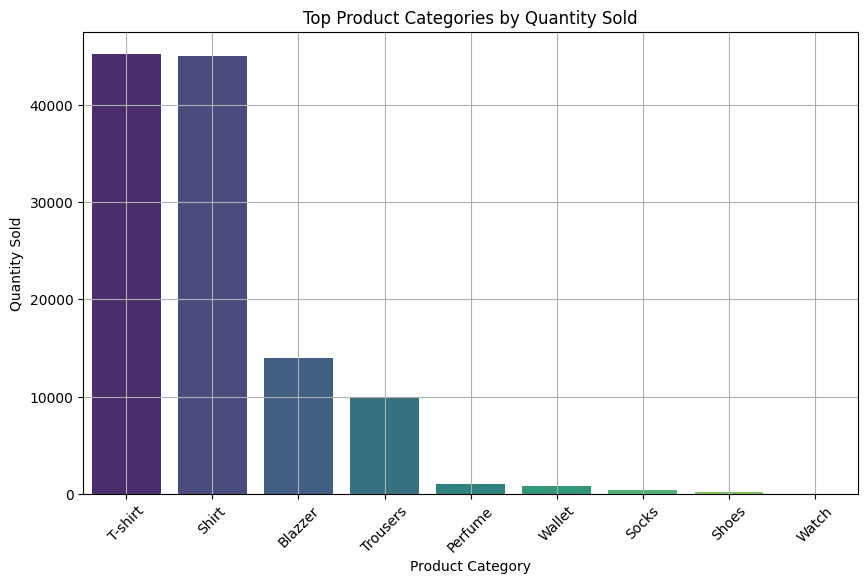

In [ ]:
# Top-performing product categories
product_performance = data.groupby('Category')['Qty'].sum().reset_index()
top_products = product_performance.sort_values(by='Qty', ascending=False)

# Plot top product categories
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Category', y='Qty', palette='viridis')
plt.title("Top Product Categories by Quantity Sold")
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.grid()
plt.show()


method analysis

<ipython-input-11-a47a5178b808>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fulfillment_stats, x='Fulfilment', y='Order ID', palette='coolwarm')


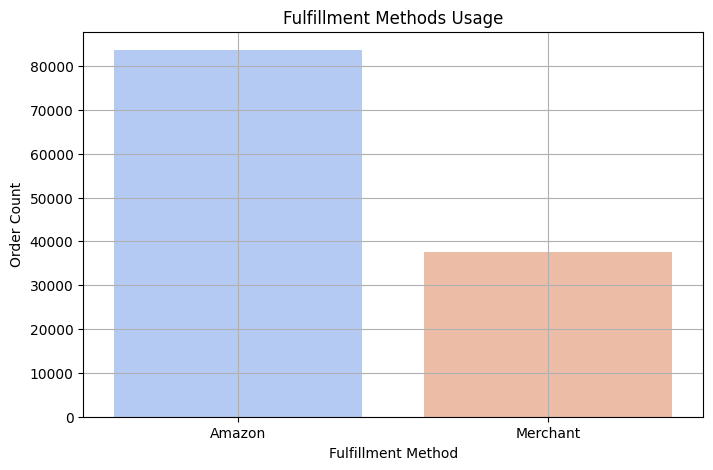

In [ ]:
# Analyze fulfillment methods
fulfillment_stats = data.groupby('Fulfilment')['Order ID'].count().reset_index()

# Plot fulfillment methods usage
plt.figure(figsize=(8, 5))
sns.barplot(data=fulfillment_stats, x='Fulfilment', y='Order ID', palette='coolwarm')
plt.title("Fulfillment Methods Usage")
plt.xlabel("Fulfillment Method")
plt.ylabel("Order Count")
plt.grid()
plt.show()

geographical analysis

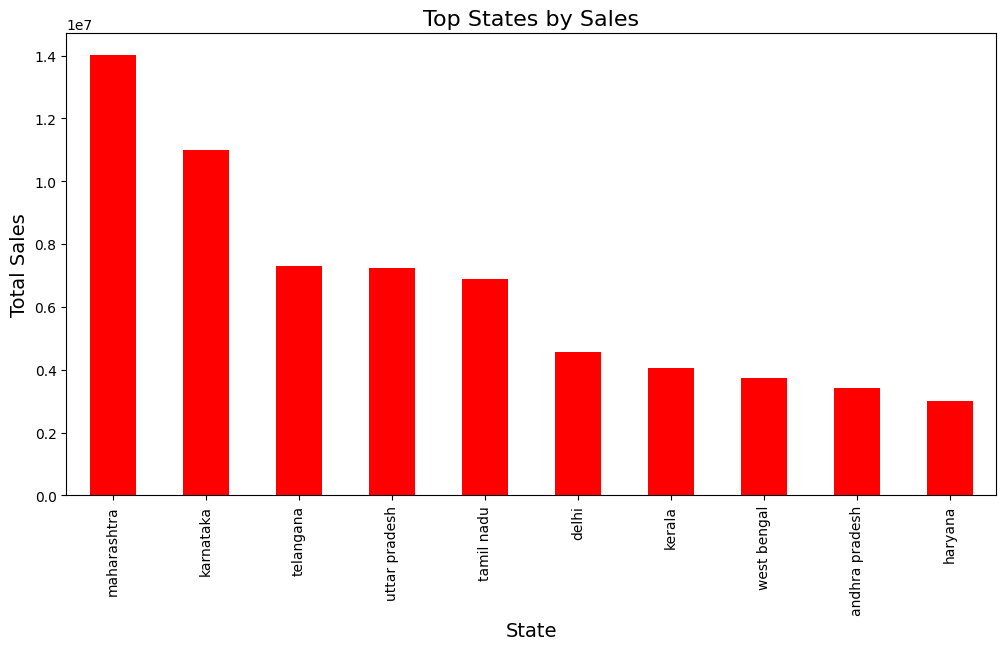

In [28]:
#  Geographical Analysis: Sales by State (Bar plot)
state_sales = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_sales.head(10).plot(kind='bar', color='red')
plt.title('Top States by Sales', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

 Geospatial Analysis

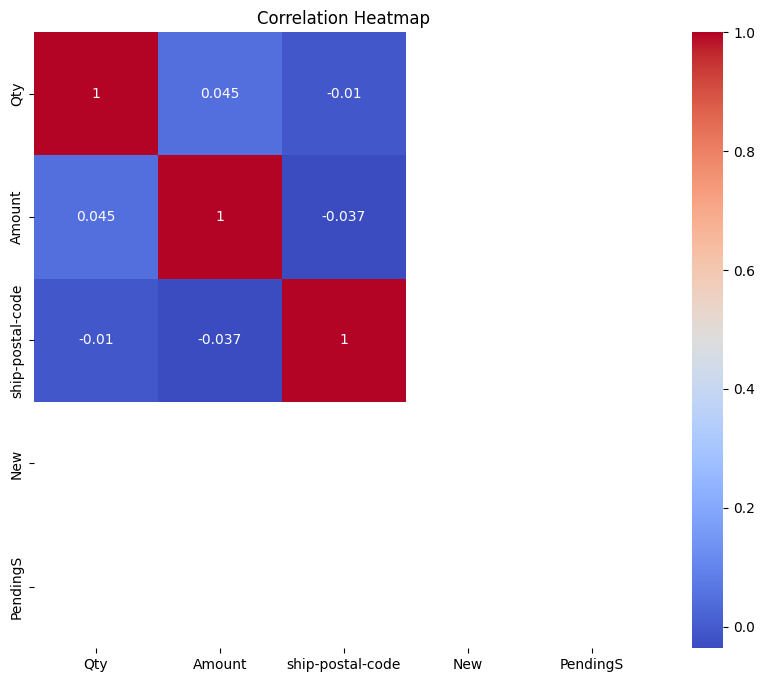

In [24]:
data['Qty'] = pd.to_numeric(data['Qty'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Re-select numeric columns after conversion
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


time series forecasting

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rm9_dl8/98cooqbk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rm9_dl8/3rj59lsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2643', 'data', 'file=/tmp/tmp8rm9_dl8/98cooqbk.json', 'init=/tmp/tmp8rm9_dl8/3rj59lsd.json', 'output', 'file=/tmp/tmp8rm9_dl8/prophet_modelctbn6gh_/prophet_model-20250104163459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


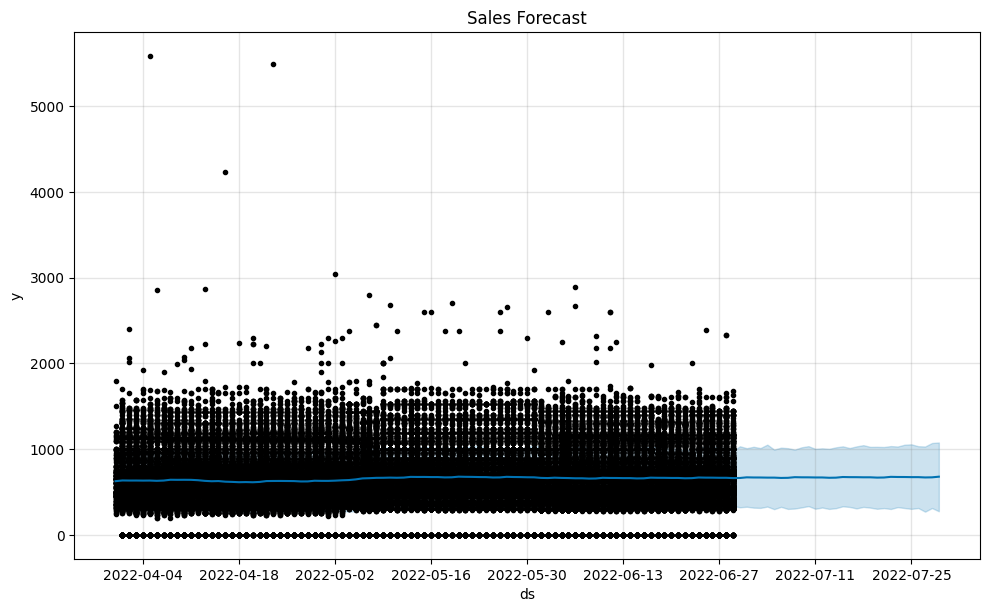

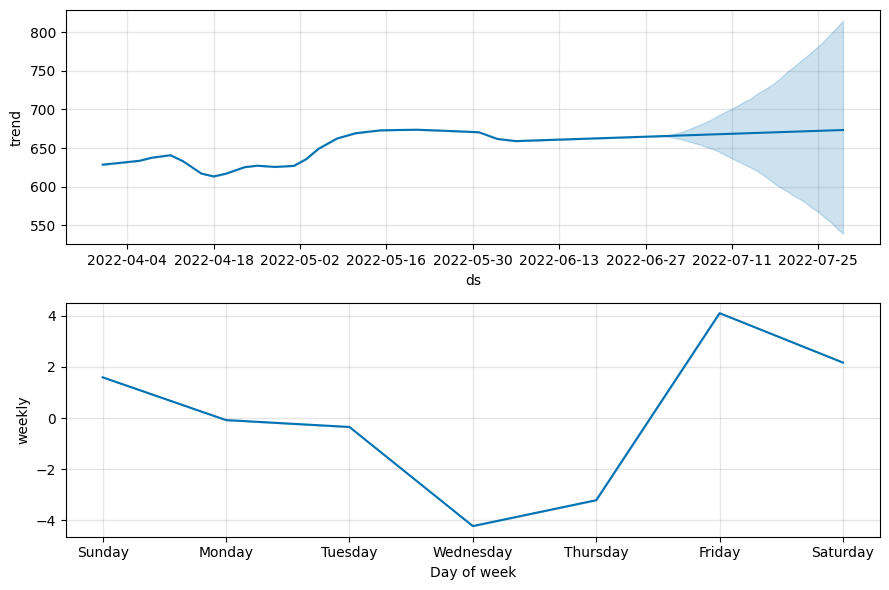

In [20]:
from prophet import Prophet

# Prepare data for Prophet
forecast_data = data[['Date', 'Amount']].rename(columns={'Date': 'ds', 'Amount': 'y'})
forecast_model = Prophet()
forecast_model.fit(forecast_data)

# Predict future
future = forecast_model.make_future_dataframe(periods=30)  # Next 30 days
forecast = forecast_model.predict(future)

# Plot forecast
forecast_model.plot(forecast)
plt.title('Sales Forecast')
plt.show()

# Plot the forecast components (trends, seasonality, etc.)
forecast_model.plot_components(forecast)
plt.show()


distribution of the sales

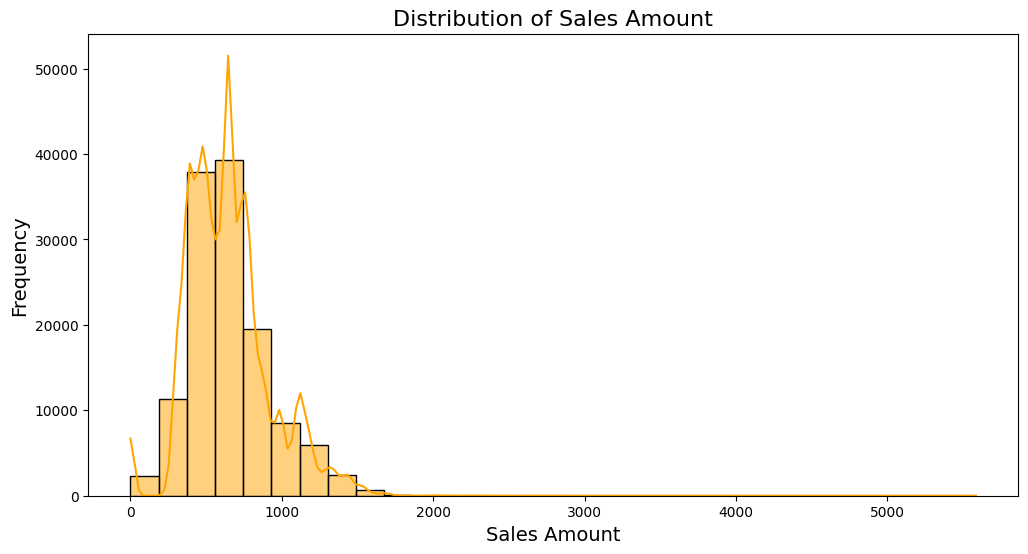

In [30]:
# 8. Distribution of Sales (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(data['Amount'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sales Amount', fontsize=16)
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

customer segmentation

<ipython-input-13-fcd421d4a702>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_sales, x='B2B', y='Amount', palette='Set2')


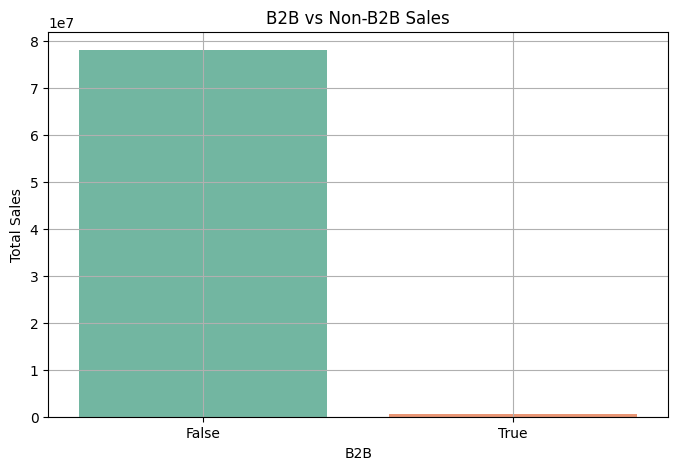

In [ ]:
# Segment B2B vs non-B2B sales
b2b_sales = data.groupby('B2B')['Amount'].sum().reset_index()

# Plot B2B vs non-B2B sales
plt.figure(figsize=(8, 5))
sns.barplot(data=b2b_sales, x='B2B', y='Amount', palette='Set2')
plt.title("B2B vs Non-B2B Sales")
plt.xlabel("B2B")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


visualization insights

<ipython-input-18-ca58f526a419>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


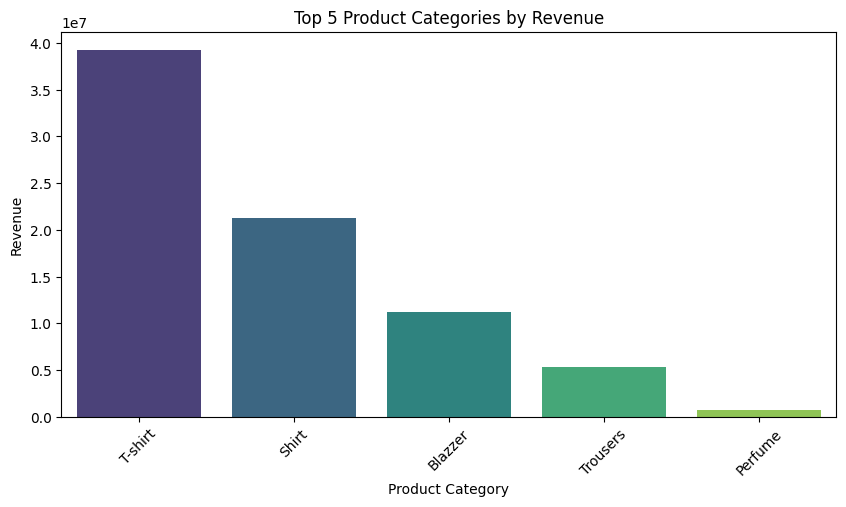

In [ ]:
# Plot Top Categories
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title("Top 5 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


business insights

In [ ]:
# Calculate Key Metrics
total_revenue = data['Amount'].sum()
average_order_value = data['Amount'].mean()
high_value_customers = data.groupby('Order ID')['Amount'].sum().sort_values(ascending=False).head(10)
top_states = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(5)
top_categories = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

# Print Key Insights
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print("Top 5 States by Revenue:")
print(top_states)
print("\nTop 5 Product Categories by Revenue:")
print(top_categories)
print("\nTop 10 High-Value Customers:")
print(high_value_customers)


Total Revenue: $78,590,170.25
Average Order Value: $648.56
Top 5 States by Revenue:
ship-state
MAHARASHTRA      13340333.05
KARNATAKA        10480694.22
TELANGANA         6915018.08
UTTAR PRADESH     6823947.08
TAMIL NADU        6519182.30
Name: Amount, dtype: float64

Top 5 Product Categories by Revenue:
Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Name: Amount, dtype: float64

Top 10 High-Value Customers:
Order ID
408-3363121-6123562    8636.0
405-8750647-4224357    8081.0
403-4288285-8521928    6993.0
404-9932919-6662730    6832.0
408-3317403-1729937    6680.0
408-4410167-4971567    6536.0
405-4755854-9568304    6535.0
406-9002076-4152331    6509.0
171-0706521-2133101    6313.0
402-5239558-4281957    6282.0
Name: Amount, dtype: float64


recomendations

In [15]:
# Enhanced Recommendations Generator

def generate_recommendations(data):
    recommendations = []

    # 1. Identify Peak and Low Sales Periods
    monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Amount'].sum()
    peak_months = monthly_sales.nlargest(3).index.strftime('%B %Y').tolist()
    low_months = monthly_sales.nsmallest(3).index.strftime('%B %Y').tolist()
    recommendations.append(f"Focus marketing and stock replenishment during peak months: {', '.join(peak_months)}.")
    recommendations.append(f"Introduce discount campaigns or promotions during low sales months: {', '.join(low_months)}.")

    # 2. Top Product Categories and Sizes
    top_categories = data.groupby('Category')['Amount'].sum().nlargest(3).index.tolist()
    top_sizes = data.groupby('Size')['Amount'].sum().nlargest(3).index.tolist()
    recommendations.append(f"Increase inventory for popular categories: {', '.join(top_categories)}.")
    recommendations.append(f"Stock more of the best-selling sizes: {', '.join(top_sizes)}.")

    # 3. Fulfillment Efficiency Analysis
    fulfillment_analysis = data.groupby('Fulfilment')['Amount'].mean().sort_values(ascending=False)
    best_fulfillment = fulfillment_analysis.idxmax()
    underperforming_fulfillment = fulfillment_analysis.idxmin()
    recommendations.append(f"Prioritize '{best_fulfillment}' fulfillment method for higher order value.")
    recommendations.append(f"Review and optimize '{underperforming_fulfillment}' fulfillment to reduce delays or inefficiencies.")

    # 4. Geographical Insights
    top_states = data.groupby('ship-state')['Amount'].sum().nlargest(5).index.tolist()
    low_states = data.groupby('ship-state')['Amount'].sum().nsmallest(5).index.tolist()
    recommendations.append(f"Focus advertising and delivery improvements in top-performing states: {', '.join(top_states)}.")
    recommendations.append(f"Investigate barriers in low-performing states: {', '.join(low_states)}.")

    # 5. Customer Segmentation
    customer_revenue = data.groupby('Order ID')['Amount'].sum()
    high_value_customers = customer_revenue[customer_revenue > customer_revenue.quantile(0.75)].index.tolist()
    low_value_customers = customer_revenue[customer_revenue <= customer_revenue.quantile(0.25)].index.tolist()
    recommendations.append(f"Launch loyalty programs or exclusive offers for {len(high_value_customers)} high-value customers.")
    recommendations.append(f"Engage {len(low_value_customers)} low-value customers with discounts or incentives to increase spending.")

    # 6. Seasonal and Regional Trends (Optional Columns)
    if 'Season' in data.columns:
        seasonal_sales = data.groupby('Season')['Amount'].sum()
        top_season = seasonal_sales.idxmax()
        recommendations.append(f"Stock up on products for the {top_season} season, as it generates the highest sales.")

    if 'ship-country' in data.columns:
        top_countries = data.groupby('ship-country')['Amount'].sum().nlargest(3).index.tolist()
        recommendations.append(f"Focus on expanding in high-revenue countries: {', '.join(top_countries)}.")

    # 7. Payment and Sales Channel Insights
    if 'Sales Channel' in data.columns:
        sales_channel_analysis = data.groupby('Sales Channel')['Amount'].sum().sort_values(ascending=False)
        top_channel = sales_channel_analysis.idxmax()
        recommendations.append(f"Invest more resources into the top-performing sales channel: {top_channel}.")

    if 'currency' in data.columns:
        currency_analysis = data.groupby('currency')['Amount'].sum().sort_values(ascending=False)
        recommendations.append(f"Optimize payment options for top currencies: {', '.join(currency_analysis.index.tolist())}.")

    return recommendations


# Generate recommendations
recommendations = generate_recommendations(data)

# Display Recommendations
print("\n--- Actionable Recommendations ---\n")
for i, rec in enumerate(recommendations, start=1):
    print(f"{i}. {rec}")



--- Actionable Recommendations ---

1. Focus marketing and stock replenishment during peak months: April 2022, May 2022, June 2022.
2. Introduce discount campaigns or promotions during low sales months: March 2022, June 2022, May 2022.
3. Increase inventory for popular categories: t-shirt, shirt, blazzer.
4. Stock more of the best-selling sizes: M, L, XL.
5. Prioritize 'amazon' fulfillment method for higher order value.
6. Review and optimize 'merchant' fulfillment to reduce delays or inefficiencies.
7. Focus advertising and delivery improvements in top-performing states: maharashtra, karnataka, telangana, uttar pradesh, tamil nadu.
8. Investigate barriers in low-performing states: pb, ar, pondicherry, punjab/mohali/zirakpur, apo.
9. Launch loyalty programs or exclusive offers for 30026 high-value customers.
10. Engage 31115 low-value customers with discounts or incentives to increase spending.
11. Focus on expanding in high-revenue countries: in.
12. Invest more resources into the to